In [1]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
1
2
from numpy import loadtxt
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# load data
dataset = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
# split data into X and y
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

In [4]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [5]:
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=Y), 100)

In [6]:
import shap

In [7]:
# load JS visualization code to notebook
shap.initjs()

In [8]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [9]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [10]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

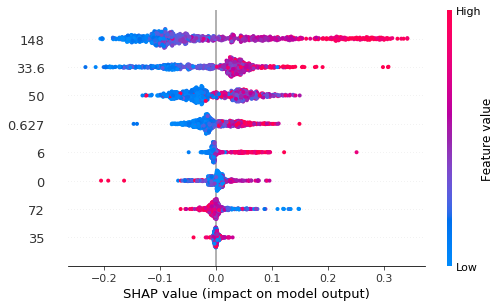

In [11]:
shap.summary_plot(shap_values, X)